In [1]:
#coding:utf-8
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False


In [2]:
import numpy as np
import pylab as pl
import cv2

In [3]:
def show(file,title):
    plt.figure(figsize=(24,20))
    plt.title(title,fontsize=24)
    plt.imshow(plt.imread(file))

In [4]:
input_dir = 'input_image/'
output_dir = 'output_image/'

In [5]:
def read_image(file):
    show(input_dir+file,'原图')
    return cv2.imread(input_dir+file)

In [6]:
# 各种卷积核
# 低通滤波
low_pass_kernel = np.array(
        [[1,  1, 1],
         [1, 1, 1],
         [1, 1, 1]])/9
# 高斯滤波
gaussian_kernel = np.array(
        [[1, 4, 7, 4, 1],
         [4,16,26,16, 4],
         [7, 26, 41, 26, 7],
         [4,16,26,16, 4],
         [1, 4, 7, 4, 1]])/273.0
# 锐化
sharpeness_kernel = np.array(
        [[0, -2, 0],
        [-2, 9, -2],
        [0, -2, 0]])
# 边缘检测
edge_kernel = np.array(
        [[-1.0, -1, -1],
         [-1, 8, -1],
         [-1, -1, -1]])
# 浮雕
embossing_kernel = np.array(
        [[-2,-2,-2,-2,0],
        [-2,-2,-2,0,2],
        [-2,-2,0,2,2],
        [-2,0,2,2,2],
        [0,2,2,2,2]])

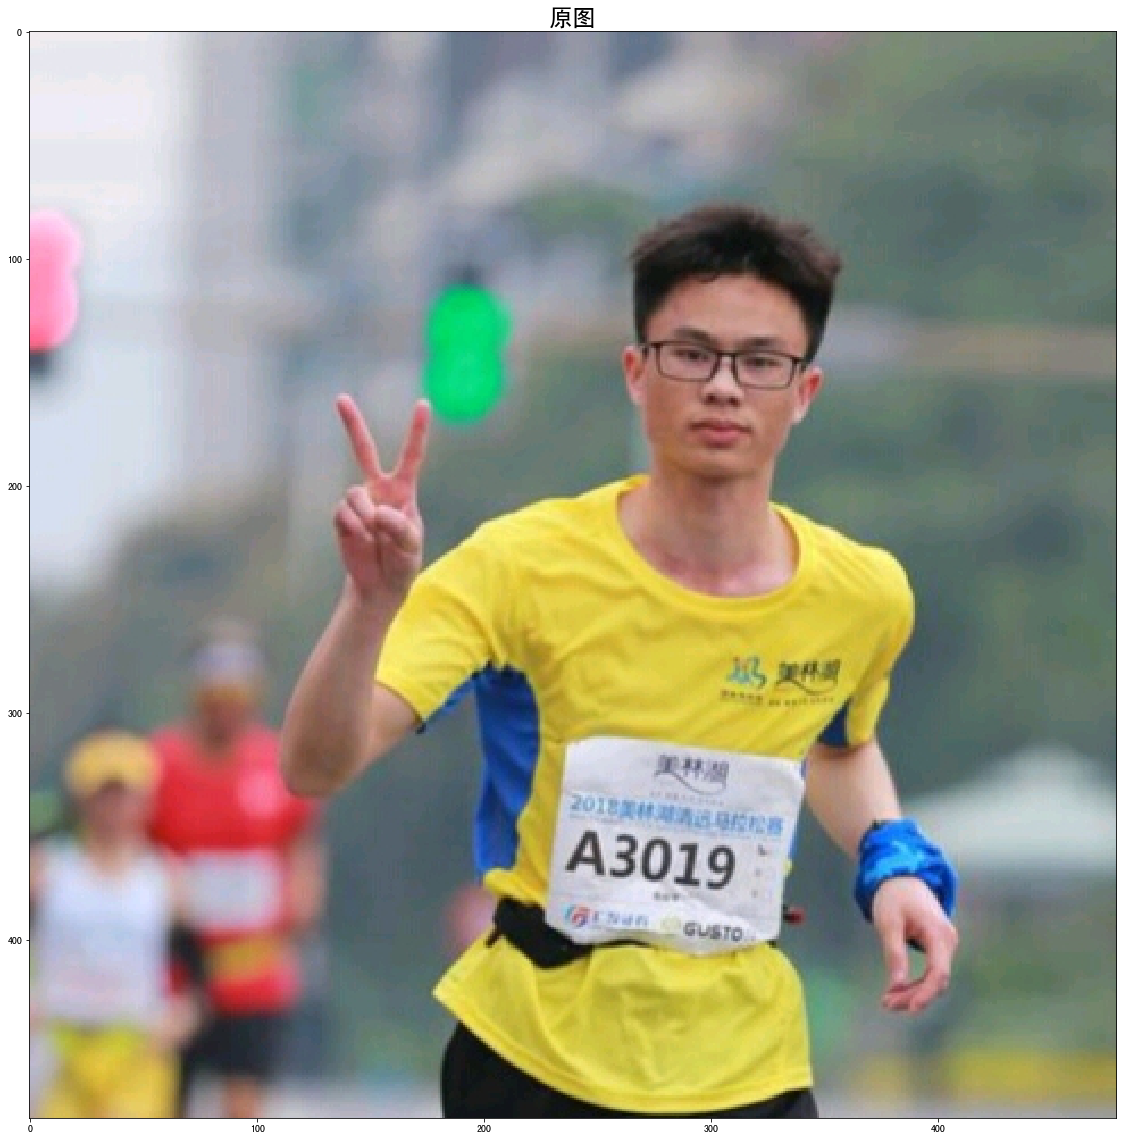

In [19]:
demo = '3'
src = read_image(demo + '.jpg')

In [8]:
def write(img,name,kernel,cvtColor = False):
    output = cv2.filter2D(img, -1, kernel)
    if cvtColor:
        output = cv2.cvtColor(output,cv2.COLOR_BGR2GRAY)
    cv2.imwrite(output_dir+name,output)
    return output_dir+name

In [20]:
all = [(u'原图', input_dir+ demo + '.jpg'), 
       (u'低通滤波',write(src ,demo + '_low_pass.jpg',low_pass_kernel)),
       (u'高斯滤波',write(src ,demo + '_gaussian.jpg',gaussian_kernel)),
       (u'锐化',write(src, demo + '_sharpeness.jpg', sharpeness_kernel)),
       (u'边缘检测',write(src, demo + '_edge.jpg', edge_kernel)),
       (u'浮雕',write(src, demo + '_embossing.jpg', embossing_kernel))]


In [10]:
def show_compare(all,figsize=(30,30),size=(3,2)):
    row,col = size
    for i in range(len(all)):
        name,file = all[i]
        plt.figure(1,figsize=(30,30))
        plt.subplot(row,col,i+1)
        plt.title(name,fontsize=24)
        img = plt.imread(file)
        plt.imshow(img)
    

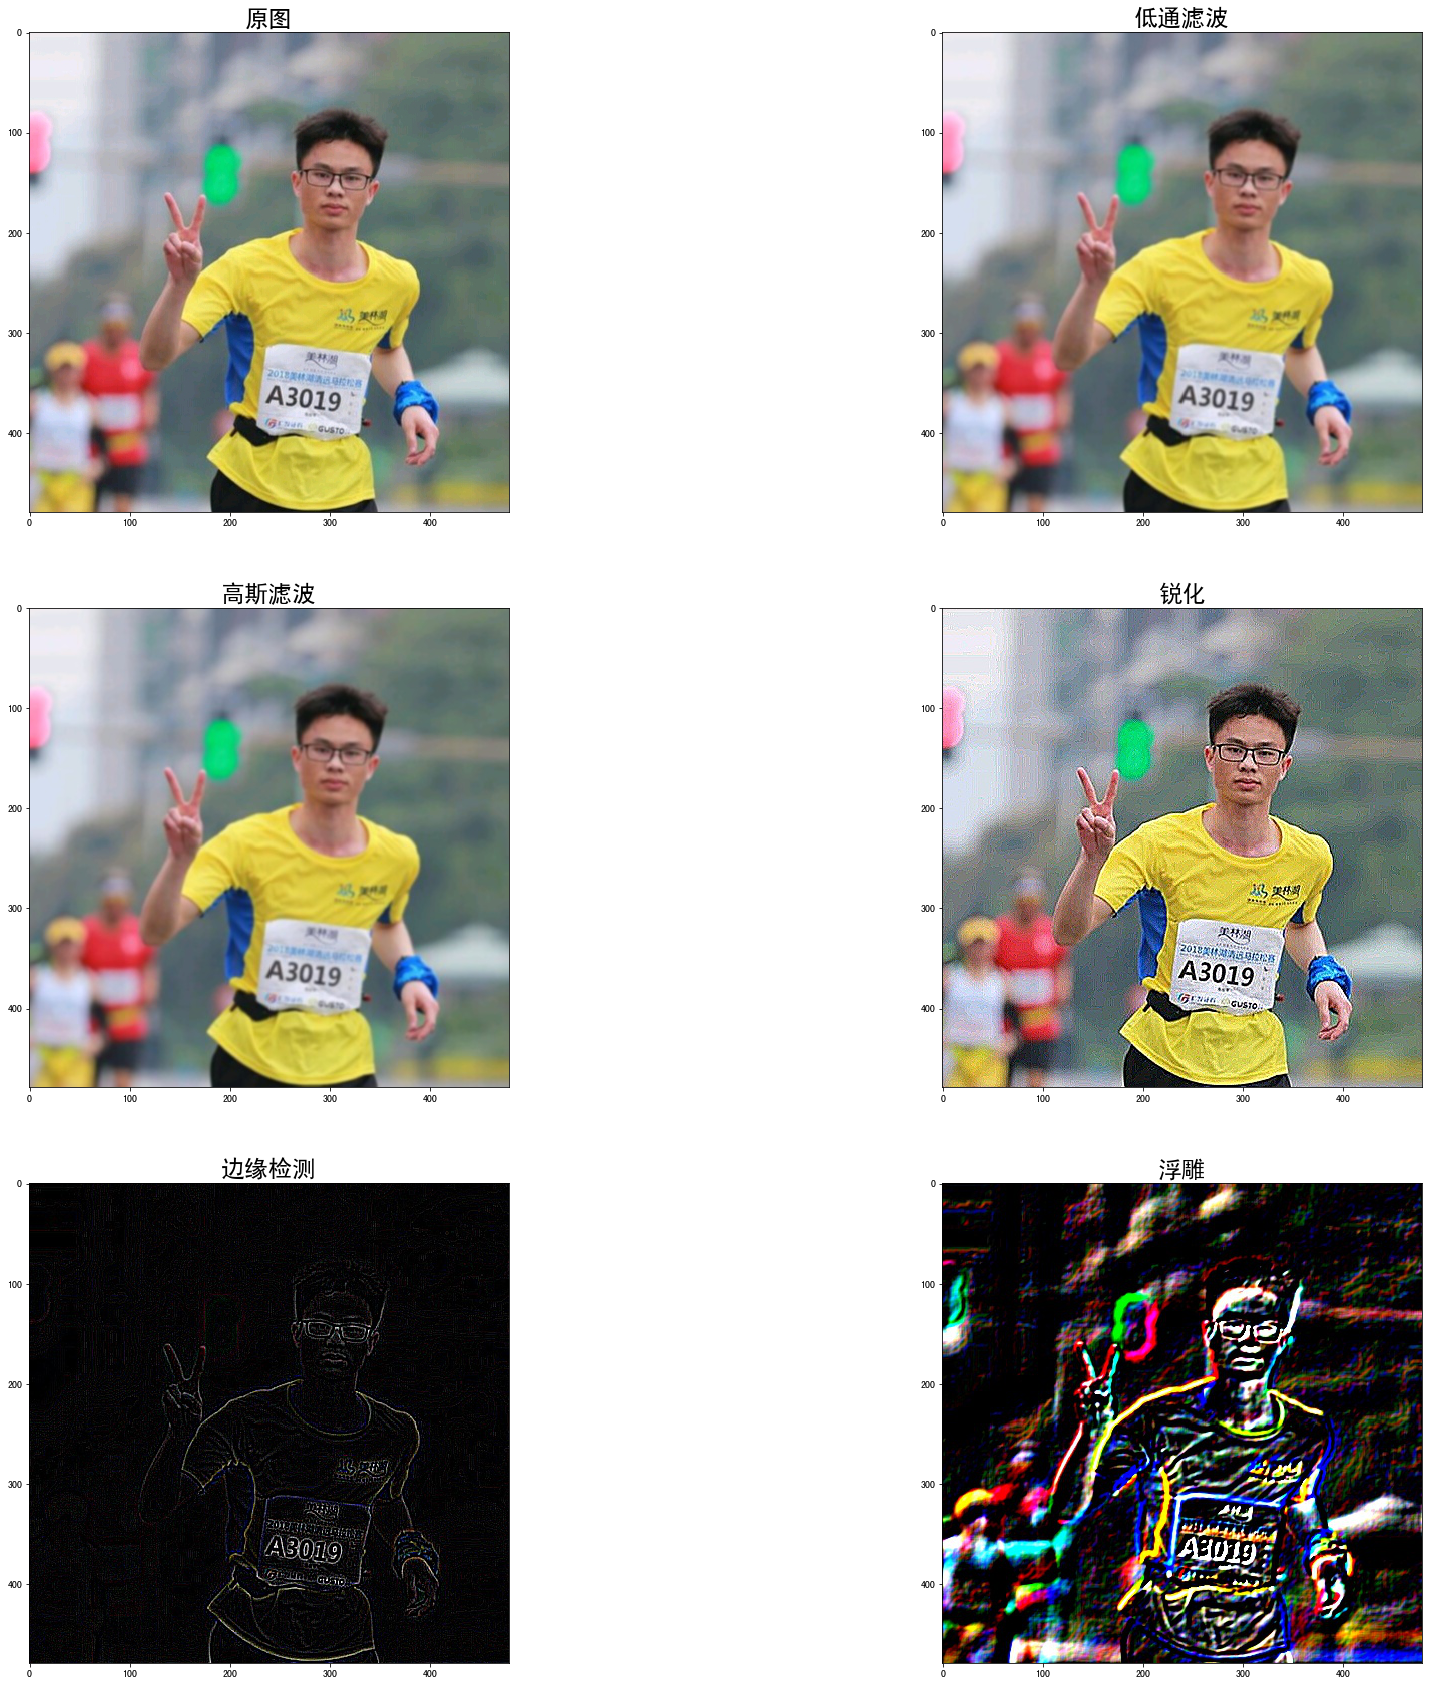

In [21]:
show_compare(all)

In [22]:
kernel = np.array(
        [[1, -99, 1],
        [-1, 5, -1],
        [1, -1, 99]])/5
write(src, demo + '_kernal.jpg', kernel)

'output_image/3_kernal.jpg'

In [23]:
kernel = np.array(
        [[1, -99, 1,8,14],
        [-1, 5, -1, -14, -8],
        [1, -1, 99, 12,-12],
        [0,0,0,0,0],
        [1,1,-1,-1,0]])/5
write(src, demo + '_kernal2.jpg', kernel)

'output_image/3_kernal2.jpg'

In [24]:
kernel = np.array(
        [[1, -55, 1,8,14],
        [-1, 5, -1, -14, -8],
        [1, -1, 55, 12,-12],
        [0,0,0,0,0],
        [1,1,-1,-1,0]])/5
write(src, demo + '_kernal3.jpg', kernel)

'output_image/3_kernal3.jpg'

In [25]:
kernel = np.array(
        [[1, -55, 1,8,14],
        [-1, 5, -1, -14, -8],
        [1, -1, 55, 12,-12],
        [2,4,6,8,10],
        [1,1,-1,-1,0]])/35
write(src, demo + '_kernal4.jpg', kernel)

'output_image/3_kernal4.jpg'